#Linear Regression for single variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#sklearn is a library. It is also called sckit-learn  

#Load csv file

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


#draw plot

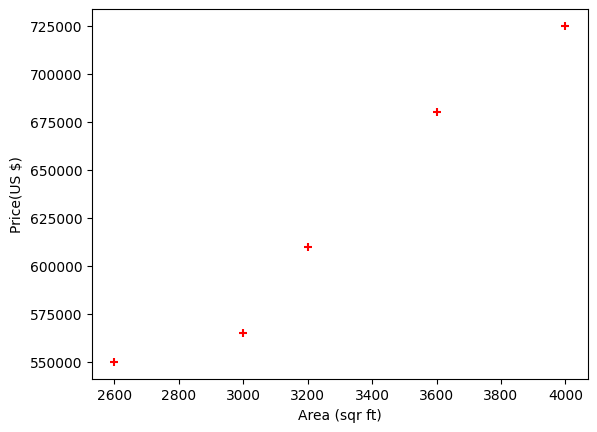

In [3]:
%matplotlib inline
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price(US $)')
plt.scatter(df.area, df.price, color='red',marker='+')

In [4]:
new_df = df.drop('price',axis='columns') #dropped the price column and print the area column
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price = df.price #print the prices
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

#Create linear regression object

In [7]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price) #area(new_df) and price are argument. that's why we separated them from csv file.

LinearRegression()

#Predict price of a home with area = 3300 sqr ft

In [8]:
reg.predict([[3300]]) #2D array. That's why area=3300 is in bracket

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

#Y = m * X + b (m is coefficient and b is intercept)

In [9]:
reg.coef_ #the value of m.

array([135.78767123])

In [10]:
reg.intercept_ #the value of b

180616.43835616432

In [11]:
3300*135.78767123 + 180616.43835616432 # value of y=m*x+b which is exactly equal to preduct value

628715.7534151643

#Predict price of a home with area = 5000 sqr ft

In [12]:
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

#Visual representation of Linear Regression

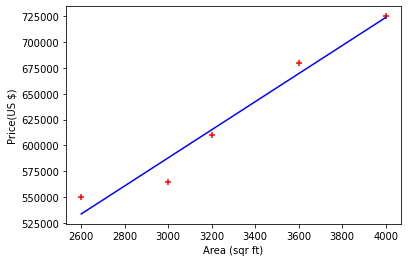

In [ ]:
%matplotlib inline
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price(US $)')
plt.scatter(df.area, df.price, color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

#Generate CSV file with list of home price predictions

In [ ]:
area_df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [ ]:
p = reg.predict(area_df) #predict price according to all area
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:

area_df['prices']=p #data frame area_df has area before. Now i have added predicted price according to area
area_df


,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/prediction.csv")
area_df
#output is simillar to generated csv file

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


#Exercise

#Linear Regression for Multiple variables/Multivariate Regression

In [ ]:
#Creating DataFrame
home_prices={
    'area':[2600,3000,3200,3600,4000,4100],
    'bedrooms':[3,4,np.NaN,3,5,6],
    'age':[20,15,18,30,8,8],
    'price':[550000,565000,610000,595000,760000,810000]
  }
df = pd.DataFrame(home_prices)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


#Data Preprocessing: Fill NA values with median value of a column

In [ ]:
df.bedrooms.median()

4.0

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median()) 
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price) #i have do it separately previous

LinearRegression()

In [ ]:
reg.coef_ #multiple coefficient are printed.  y=m1x1 + m2x2 + m3x3 + b

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_  #y=m1x1 + m2x2 + m3x3 + b

221323.00186540396

#Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [ ]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [ ]:
#proof with equation
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

#Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

In [ ]:
reg.predict([[2500, 4, 5]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([578876.03748933])